## kelvin波超前滞后合成图

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from netCDF4 import Dataset
from cartopy.mpl.ticker import LongitudeFormatter  # 确保已安装cartopy
import cmaps

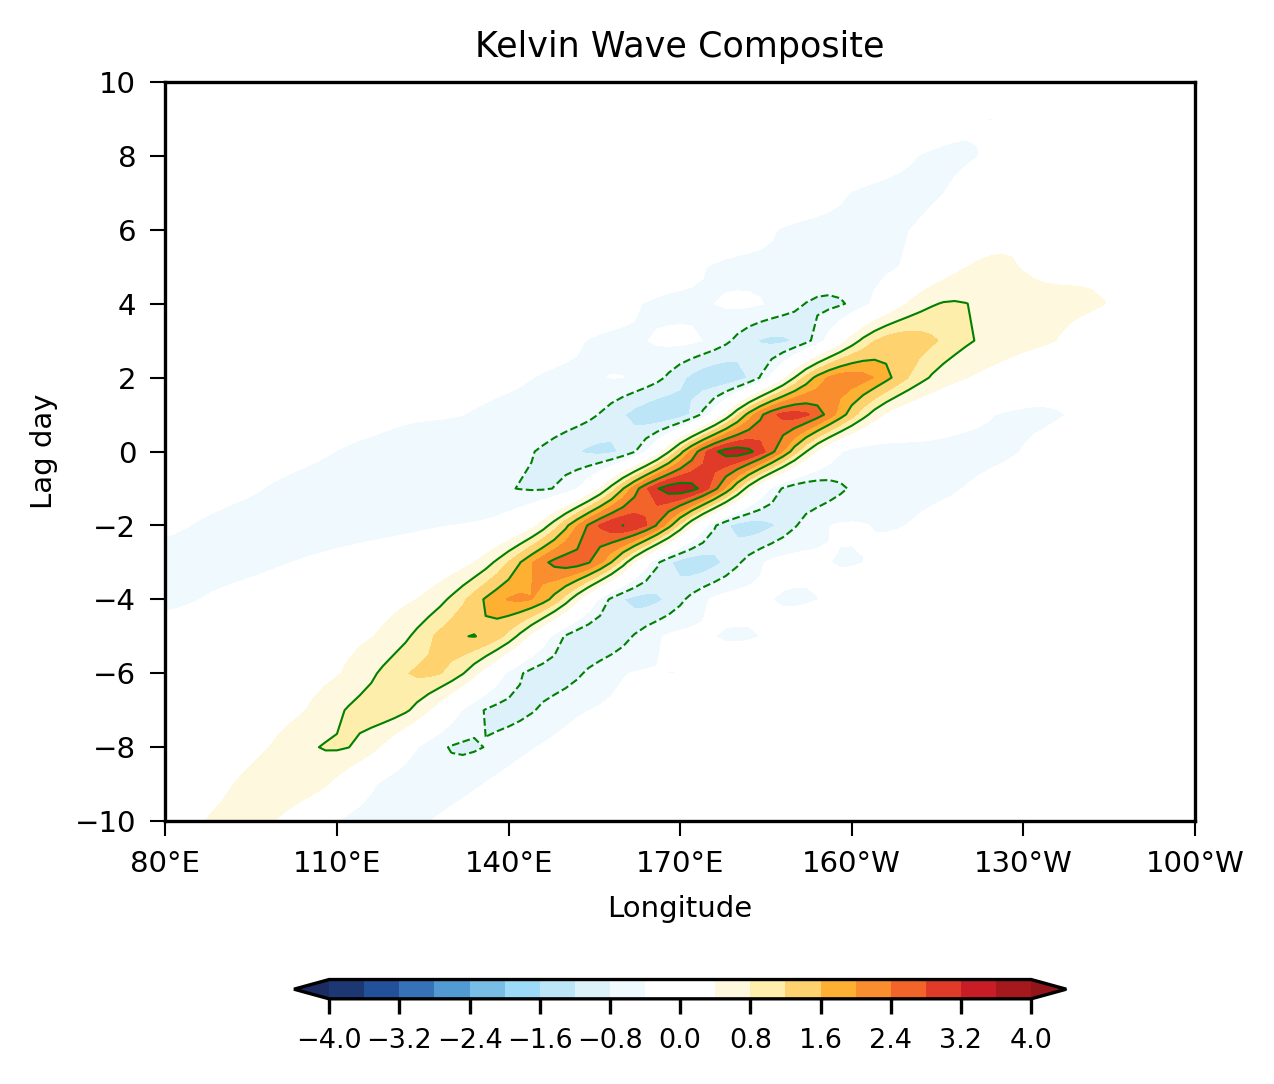

In [8]:
def read_netcdf_data(file_path, variables):
    """读取NetCDF文件数据"""
    with Dataset(file_path, "r") as data:
        return {var: data.variables[var][:] for var in variables}

def plot_hovmoller(data_dict, plot_params, save_path):
    """绘制Hovmöller图并保存"""
    # 解包参数
    clev = plot_params['clev']
    cticks = plot_params['cticks']
    contour_levels = plot_params['contour_levels']
    cmap = cmaps.BlueWhiteOrangeRed
    title = plot_params['title']
    xlim = plot_params['xlim']
    ylim = plot_params['ylim']
    
    # 创建图形
    fig, ax = plt.subplots(figsize=(4.4, 4.4), dpi=300)
    plt.rcParams.update({'font.size': 7})
    plt.subplots_adjust(left=0.15, right=0.93, top=0.9, bottom=0.1)

    # 绘制填色图
    cf = ax.contourf(data_dict['lont'], data_dict['tlon'], 
                     data_dict['pr_kw_hovmoller'], 
                     levels=clev, cmap=cmap, extend='both')

    # 绘制等值线
    cs_p = ax.contour(data_dict['lont'], data_dict['tlon'], 
                      data_dict['pr_kw_hovmoller'],
                      levels=contour_levels['positive'], 
                      colors='g', linewidths=0.5)
    cs_n = ax.contour(data_dict['lont'], data_dict['tlon'], 
                      data_dict['pr_kw_hovmoller'],
                      levels=contour_levels['negative'], 
                      colors='g', linestyles='dashed', linewidths=0.5)

    # 坐标轴设置
    ax.set(xlabel='Longitude', ylabel='Lag day', title=title,
           xlim=xlim, ylim=ylim)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    ax.set_xticks(np.arange(80, 270, 30))
    ax.set_yticks(np.arange(-10, 12, 2))
    
    # 统一设置刻度参数
    ax.tick_params(width=0.5, direction='out',
                   bottom=True, top=False, left=True, right=False)

    # 颜色条
    cb = fig.colorbar(cf, ax=ax, orientation='horizontal',
                      shrink=0.75, pad=0.15, aspect=40)
    cb.set_ticks(cticks)
    cb.ax.tick_params(labelsize=6.5)

    # 保存图像
    plt.savefig(save_path, format='png', dpi=600)
    plt.show()
    plt.close()


    

# 参数配置
config = {
    "file_path": r"I:/kw_composite_lag_lon_prano_prkw.nc",
    "variables": ['pr_kw_comp', 'lon', 'tlag', 'lont', 'tlon'],
    "plot_params": {
        "clev": np.arange(-4, 4.4, 0.4),
        "cticks": np.arange(-4, 4.8, 0.8),
        "contour_levels": {
            "positive": np.arange(0.8, 4.8, 0.8),
            "negative": np.arange(-4, 0, 0.8)
        },
        "cmap": 'RdBu_r',
        "title": "Kelvin Wave Composite",
        "xlim": [80, 260],
        "ylim": [-10, 10]
    },
    "save_path": "fig_lon_t_hovmoller_prano_vs_kwpr.png"
}

# 主流程
if __name__ == "__main__":
    # 读取数据
    raw_data = read_netcdf_data(config["file_path"], 
                               config["variables"] + ['pr_ano_comp'])
    
    # 准备绘图数据
    plot_data = {
        'pr_kw_hovmoller': raw_data['pr_kw_comp'][:],
        'lont': raw_data['lont'][:],
        'tlon': raw_data['tlon'][:]
    }
    
    # 绘制图形
    plot_hovmoller(plot_data, config["plot_params"], config["save_path"])